In [6]:
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import matplotlib.pyplot as plt
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize, SubprocVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env
import gym
import numpy as np
import time
from stable_baselines3.common.callbacks import EvalCallback
import env_test1
env = env_test1.DroneEnv()
check_env(env)
env = DummyVecEnv([lambda: env])

### 训练模型

In [7]:

#vec_env = VecNormalize(env, norm_obs=True, norm_reward=True,clip_obs=1)

model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./tensorboard/",device="cuda")
# Evaluation callback
callbacks = []
eval_callback = EvalCallback(
    env,
    callback_on_new_best=None,
    n_eval_episodes=8,
    best_model_save_path=".",
    log_path=".",
    eval_freq=4000,
)

callbacks.append(eval_callback)
kwargs = {}
kwargs["callback"] = callbacks

log_name = "ppo_run_" + str(time.time())

model.learn(
    total_timesteps=200000,
    tb_log_name=log_name,
    **kwargs
)



Using cuda device
Logging to ./tensorboard/ppo_run_1713425380.3104565_1
-----------------------------
| time/              |      |
|    fps             | 1141 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
Eval num_timesteps=4000, episode_reward=-5494.55 +/- 0.00
Episode length: 501.00 +/- 0.00
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 501           |
|    mean_reward          | -5.49e+03     |
| time/                   |               |
|    total_timesteps      | 4000          |
| train/                  |               |
|    approx_kl            | 0.00050675636 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -9.3e-06      |
|    learning_rate        | 0.0003        |
|    loss                 | 5.82e+05      |
|    n_updat

In [11]:

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Before training: mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
# 开始训练
#model.learn(total_timesteps=100000,tb_log_name=log_name,
    #**kwargs)
# 评估训练后的 policy
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"After training: mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

Before training: mean_reward:-3930.03 +/- 0.00
After training: mean_reward:-3930.03 +/- 0.00


### 绘图检验

Total reward: -3930.0314151019556


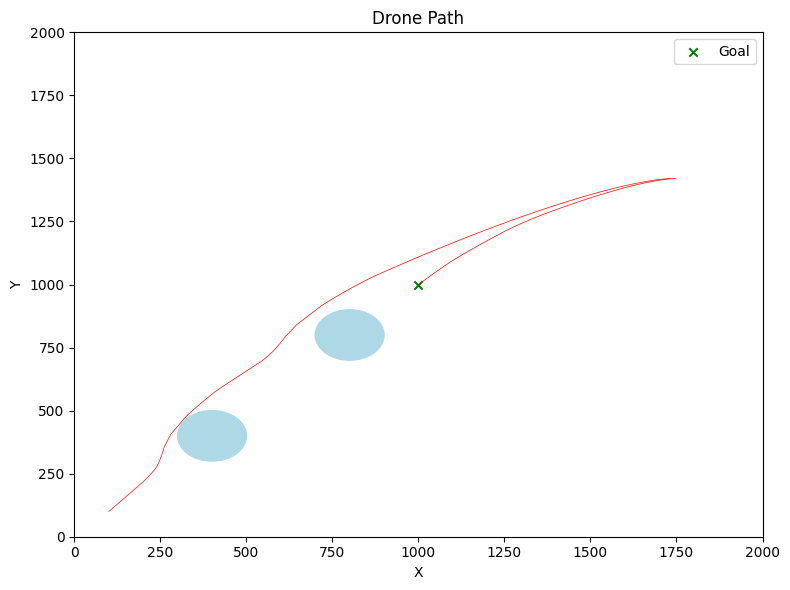

In [12]:
import matplotlib.pyplot as plt

# 创建一个包含一个子图的窗口
fig, ax = plt.subplots(figsize=(8, 6))

env = env_test1.DroneEnv()

# 重置环境
state, info = env.reset()
trajectory_x = [env.xy_p[0]]  # 存储无人机路径的x坐标
trajectory_y = [env.xy_p[1]]  # 存储无人机路径的y坐标
trajectory_ex = [env.xy_e[0]]  # 存储无人机路径的x坐标
trajectory_ey = [env.xy_e[1]]  # 存储无人机路径的y坐标

# 在子图中绘制环境和障碍物
ax.scatter(env.xy_e[0], env.xy_e[1], marker='x', color='green', label='Goal')
for k in env.obstacles:
    obstacle_circle = plt.Circle(k, env.r_obstacles, color='lightblue', fill=True)
    ax.add_patch(obstacle_circle)
ax.set_xlim(env.space1.low[0], env.space1.high[0])
ax.set_ylim(env.space1.low[1], env.space1.high[1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.set_title('Drone Path')

# 通过预训练模型控制无人机执行任务并绘制路径
#model = PPO.load("best_model") 
done = False
total_reward = 0
count = 0
while not done:
    count += 1
    action, _states = model.predict(state, deterministic=True)
    next_state, reward, done, t, info = env.step(action)
    #if reward < -10:
        #print(state, action, reward)
    if count > 500:
        done = True
    total_reward += reward
    state = next_state
    trajectory_x.append(env.xy_p[0])  # 更新无人机路径的x坐标
    trajectory_y.append(env.xy_p[1])  # 更新无人机路径的y坐标
    trajectory_ex.append(env.xy_e[0])  # 更新无人机路径的x坐标
    trajectory_ey.append(env.xy_e[1])  # 更新无人机路径的y坐标

# 绘制无人机路径
ax.plot(trajectory_x, trajectory_y, color='red', linewidth=0.5)
ax.plot(trajectory_ex, trajectory_ey, color='red', linewidth=0.5)

# 打印每个episode的总奖励
print('Total reward:', total_reward)

# 显示子图窗口
plt.tight_layout()
plt.show()


Total reward: -3930.0314151019556


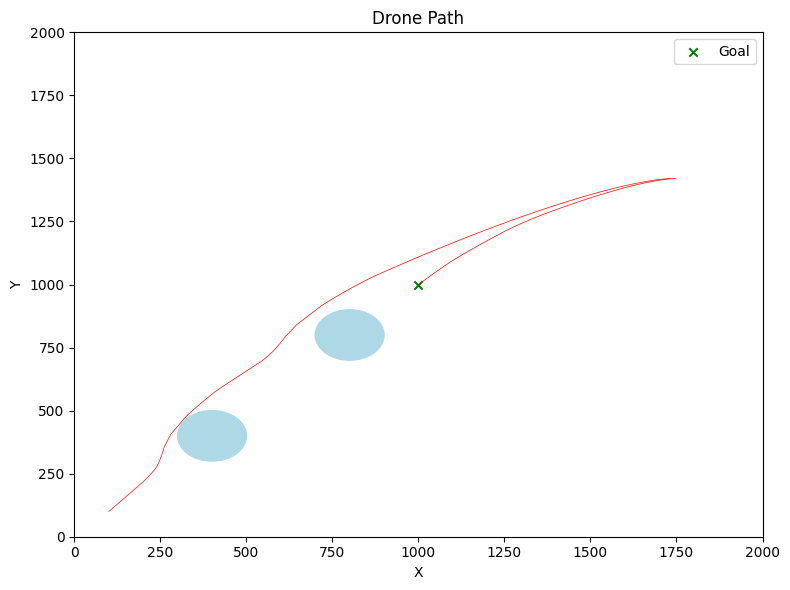

In [13]:
import matplotlib.pyplot as plt

# 创建一个包含一个子图的窗口
fig, ax = plt.subplots(figsize=(8, 6))

env = env_test1.DroneEnv()

# 重置环境
state, info = env.reset()
trajectory_x = [env.xy_p[0]]  # 存储无人机路径的x坐标
trajectory_y = [env.xy_p[1]]  # 存储无人机路径的y坐标
trajectory_ex = [env.xy_e[0]]  # 存储无人机路径的x坐标
trajectory_ey = [env.xy_e[1]]  # 存储无人机路径的y坐标

# 在子图中绘制环境和障碍物
ax.scatter(env.xy_e[0], env.xy_e[1], marker='x', color='green', label='Goal')
for k in env.obstacles:
    obstacle_circle = plt.Circle(k, env.r_obstacles, color='lightblue', fill=True)
    ax.add_patch(obstacle_circle)
ax.set_xlim(env.space1.low[0], env.space1.high[0])
ax.set_ylim(env.space1.low[1], env.space1.high[1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.set_title('Drone Path')

# 通过预训练模型控制无人机执行任务并绘制路径
model = PPO.load("best_model") 
done = False
total_reward = 0
count = 0
while not done:
    count += 1
    action, _states = model.predict(state, deterministic=True)
    next_state, reward, done, t, info = env.step(action)
    #if reward < -10:
        #print(state, action, reward)
    if count > 500:
        done = True
    total_reward += reward
    state = next_state
    trajectory_x.append(env.xy_p[0])  # 更新无人机路径的x坐标
    trajectory_y.append(env.xy_p[1])  # 更新无人机路径的y坐标
    trajectory_ex.append(env.xy_e[0])  # 更新无人机路径的x坐标
    trajectory_ey.append(env.xy_e[1])  # 更新无人机路径的y坐标

# 绘制无人机路径
ax.plot(trajectory_x, trajectory_y, color='red', linewidth=0.5)
ax.plot(trajectory_ex, trajectory_ey, color='red', linewidth=0.5)

# 打印每个episode的总奖励
print('Total reward:', total_reward)

# 显示子图窗口
plt.tight_layout()
plt.show()


### 逐渐学习ing

In [ ]:
import time
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback


# 加载预训练的模型
model = PPO.load("best_model")

# Evaluation callback
eval_callback = EvalCallback(
    env,
    eval_freq=500,
    n_eval_episodes=4,
    best_model_save_path=".",
    log_path=".",
)

# 继续训练加载的模型
model.learn(
    total_timesteps=200000,
    callback=eval_callback,
    tb_log_name="ppo_run_" + str(time.time()),
)
